14581323807234132972
this node has 5 children
move:(8, 6), runs:  4593214, eval:-0.2139, principal:86 60 10 51 84 64 25 76 31 04 24 85 67 23 62 07 03 12 38 17 33 21 
move:(6, 7), runs:    11205, eval:-0.0693, principal:67 04 25 86 70 51 
move:(7, 6), runs:     7022, eval:+0.0159, principal:76 51 64 03 21 73 
move:(7, 8), runs:     4665, eval:+0.1316, principal:78 57 65 18 36 21 
move:(7, 7), runs:     3893, eval:+0.2001, principal:77 44 33 21 64 14 53 

86 60 10 51 84 64 25 76 31 04 24 85 67 23 62 07 03 12 38 17 33 21 65 16 52 66 20 71 35 18 36 11 55 78 56 70 32 26 61 15 57 83 72 46 41 44 53 42 


KeyboardInterrupt: 

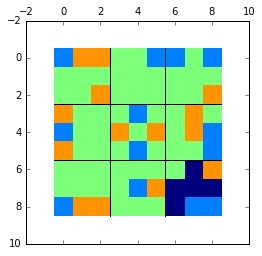

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
from tictactics_policy import tictactics_simulation_policy as sim_pol
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,1),(0,2),(3,0),(5,0),(4,3),(4,5),(4,7),(8,1),(8,2)]:
    board[x]=1
for o in [(0,0),(4,0),(8,0),(3,4),(5,4),(0,8),(4,8),(8,8),(7,4)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,7),(0,5),(2,8),(8,7),(7,5),(5,8),(6,8),(0,6),(2,2)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

# cProfile.run('mc_sim(root,game,branch = 50,passes = 1000000,eval_fun = None)',sort = 'tottime')
mc_sim(root,game,branch = 50,passes = 100000000,eval_fun = None)

nodes visited   35
cache space     30000034
nodes stored    30
nodes forgotten 0
current depth   0
current node    
role: max
  root: work:        30 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

role: min
(7, 8): work:         1 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(6, 7): work:        28 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

time 0.00553167686257

(6, 7)(1, 3)
	(4, 1)(3, 3)
		(1, 2)(3, 8) p2win
		(2, 1)(7, 3)
			(4, 2)(3, 8) p2win
	(4, 2)(3, 8) p2win
	(5, 1)(6, 3)
		(1, 2)(3, 8) p2win
(7, 8)(3, 8) p2win


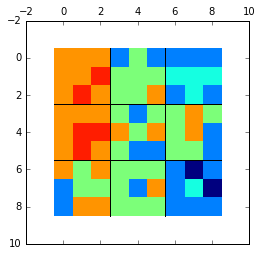

In [3]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,1),(0,2),(3,0),(5,0),(4,3),(4,5),(4,7),(8,1),(8,2)]:
    board[x]=1
for o in [(0,0),(4,0),(8,0),(3,4),(5,4),(0,8),(4,8),(8,8),(7,4)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,7),(0,5),(2,8),(8,7),(7,5),(5,8),(6,8),(0,6),(2,2),(8,6),(6,2),(0,7),(2,5),(7,6),
             (3,2),(2,6),(6,0),(1,0),(5,2),(6,6),(2,0),(7,0),(3,1),(0,3),(1,1),(5,5)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()




tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},1,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree